# Convolution (u[n] * δ[n-2])

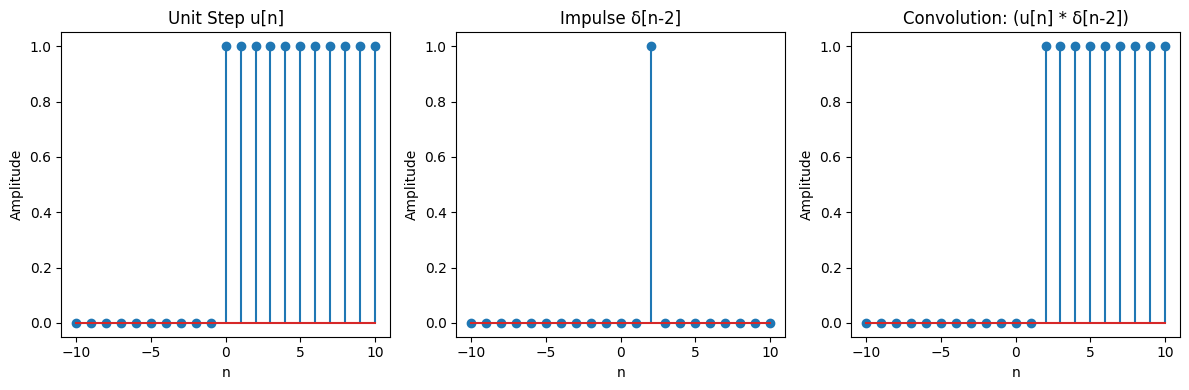

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
n = np.arange(-10, 11, 1)

# Create unit step function u[n]
def u(n):
    return np.heaviside(n, 1)

# Create delta function δ[n-2]
def delta(n, k):
    return np.array([1 if i == k else 0 for i in n])

# Generate signals
u_n = u(n)
delta_n = delta(n, 2)  # δ[n-2]

# Plot signals
plt.figure(figsize=(12, 4))

# Plot u[n]
plt.subplot(1, 3, 1)
plt.stem(n, u_n)
plt.title('Unit Step u[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

# Plot δ[n-2]
plt.subplot(1, 3, 2)
plt.stem(n, delta_n)
plt.title('Impulse δ[n-2]')
plt.xlabel('n')
plt.ylabel('Amplitude')

# Perform convolution
# The convolution of u[n] with δ[n-2] is just u[n-2]
n_conv = np.arange(-10, 11, 1)
conv_result = u(n_conv - 2)  # Shift the unit step by 2

plt.subplot(1, 3, 3)
plt.stem(n_conv, conv_result)
plt.title('Convolution: (u[n] * δ[n-2])')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Signal : x(t) = 5 cos(2π 2000 t) + 3 cos(2π 3000 t) 

1- FFT Spectrum ( Bilateral spectrum of the signal )

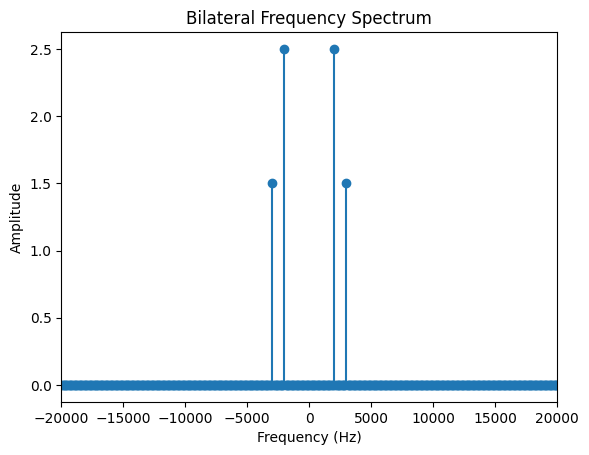

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 80000  # Sampling frequency (Hz)
t = np.linspace(0, 0.01, int(fs * 0.01), endpoint=False)  # Time vector
x_t = 2.5 * np.cos(2 * np.pi * 2000 * t) + 1.5 * np.cos(2 * np.pi * 3000 * t)  # Signal

# FFT computation
X_f = np.fft.fft(x_t)
freqs = np.fft.fftfreq(len(t), 1 / fs)
X_f = X_f / (len(t) / 2)  # Scaling

# Plot spectrum
plt.stem(freqs, np.abs(X_f), basefmt=" ")
plt.xlim(-20000, 20000)
plt.title("Bilateral Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

2- Bilateral sampled signal spectrum :

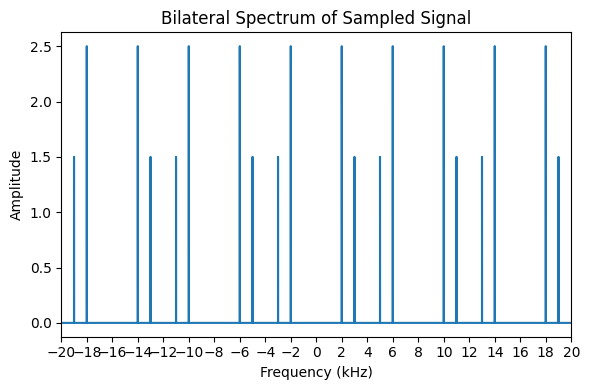

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
f1, f2 = 2000, 3000  # Frequencies in Hz
A1, A2 = 5, 3        # Amplitudes
fs = 8000            # Sampling frequency in Hz
fc = 4000            # Cutoff frequency for LPF in Hz

# Create frequency axis up to 20 kHz for plotting
f = np.linspace(-20000, 20000, 20000)  # Bilateral axis for full spectrum analysis

# Function to create spectrum of a cosine wave
def cosine_spectrum(A, f0, f):
    spectrum = np.zeros_like(f)
    spectrum += (A/2) * (np.abs(f - f0) < 1)  # Positive frequency delta
    spectrum += (A/2) * (np.abs(f + f0) < 1)  # Negative frequency delta
    return spectrum

# Function to create spectrum of a sampled cosine
def sampled_cosine_spectrum(A, f0, fs, f):
    spectrum = np.zeros_like(f)
    for k in range(-5, 6):  # Consider replicas up to ±5*fs
        spectrum += cosine_spectrum(A, f0 + k*fs, f)
    return spectrum

# Calculate spectrums
original_spectrum = cosine_spectrum(A1, f1, f) + cosine_spectrum(A2, f2, f)
sampled_spectrum = sampled_cosine_spectrum(A1, f1, fs, f) + sampled_cosine_spectrum(A2, f2, fs, f)


#-------------------------------------------

#Bilateral Spectrum of Sampled Signal

sampled_spectrum = sampled_cosine_spectrum(A1, f1, fs, f) + sampled_cosine_spectrum(A2, f2, fs, f)

plt.figure(figsize=(6, 4))
plt.plot(f/1000, sampled_spectrum)
plt.title('Bilateral Spectrum of Sampled Signal')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.xlim(-20, 20)
plt.xticks(np.arange(-20, 21, 2))  # Step of 2 kHz
plt.tight_layout()
plt.show()


3- Bilateral spectrum after ideal LPF (f_c = 4Khz) :

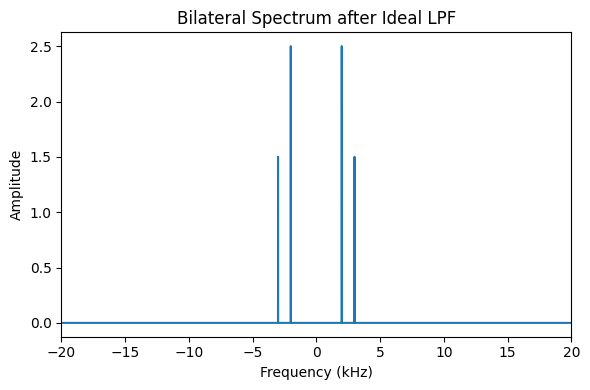

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
f1, f2 = 2000, 3000  # Frequencies in Hz
A1, A2 = 5, 3        # Amplitudes
fs = 8000            # Sampling frequency in Hz
fc = 4000            # Cutoff frequency for LPF in Hz

# Create frequency axis up to 20 kHz for plotting
f = np.linspace(-20000, 20000, 20000)  # Bilateral axis for full spectrum analysis

# Function to create spectrum of a cosine wave
def cosine_spectrum(A, f0, f):
    spectrum = np.zeros_like(f)
    spectrum += (A/2) * (np.abs(f - f0) < 1)  # Positive frequency delta
    spectrum += (A/2) * (np.abs(f + f0) < 1)  # Negative frequency delta
    return spectrum

# Function to create spectrum of a sampled cosine
def sampled_cosine_spectrum(A, f0, fs, f):
    spectrum = np.zeros_like(f)
    for k in range(-5, 6):  # Consider replicas up to ±5*fs
        spectrum += cosine_spectrum(A, f0 + k*fs, f)
    return spectrum

# Calculate spectrums
original_spectrum = cosine_spectrum(A1, f1, f) + cosine_spectrum(A2, f2, f)
sampled_spectrum = sampled_cosine_spectrum(A1, f1, fs, f) + sampled_cosine_spectrum(A2, f2, fs, f)


# Create ideal lowpass filter
H = np.where(np.abs(f) <= fc, 1, 0)  # LPF filter for bilateral spectrum
recovered_spectrum = sampled_spectrum * H


#-------------------------------------------

#Bilateral Spectrum of Sampled Signa

recovered_spectrum = sampled_spectrum * H

plt.figure(figsize=(6, 4))
plt.plot(f/1000, recovered_spectrum)
plt.title('Bilateral Spectrum after Ideal LPF')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.xlim(-20, 20)
plt.tight_layout()
plt.show()


we notice that we have a good signal recovery after applying the ideal LPF to the sampled bilateral signal spectrum
x(t)_transmission = x(t)_reception
As the Shannon Theorem is already verified : 
f_s >= 2 x f_max ---->
8kHz >= 2 x 3kHz ---->
8kHz >= 6kHz